In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Data Loading

In [3]:
data = pd.read_csv('ks-projects-201801.csv')

# Data Shape

In [4]:
data.shape

(378661, 15)

# Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# Data Header

In [6]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Numerical Fields Summary

In [7]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Feature Engineering

### Adding Success Feature

In [8]:
print(data['state'].value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [9]:
data['success'] = data['state'].map({'successful':'successful',
                                     'failed':'failed',
                                     'canceled':'failed',
                                     'suspended':'failed'})

In [10]:
print(data['success'].value_counts())

failed        238344
successful    133956
Name: success, dtype: int64


### Data Removal

In [11]:
data.drop(data[(data.state == 'live')].index ,inplace=True)

In [12]:
data.drop(['ID', 'name', 'usd pledged', 'state', 'deadline', 'launched'], axis = 1, inplace=True)

# Exploratory Data Analysis

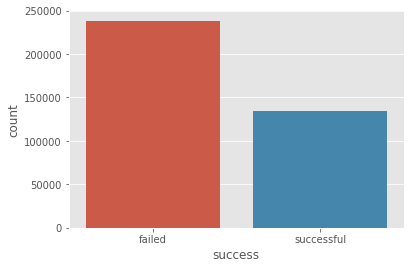

In [13]:
sns.countplot(data['success'])

## Missing Data 

In [14]:
print('Data:', data.isnull().values.any())

Data: True


In [15]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Feature', 'Total']
missing_df['Percentage'] = ((missing_df['Total'] / data.shape[0])*100)
missing_df.sort_values('Percentage', ascending=False, inplace=True)
missing_df

,Feature,Total,Percentage
9,success,3562,0.947688
0,category,0,0.000000
1,main_category,0,0.000000
2,currency,0,0.000000
3,goal,0,0.000000
4,pledged,0,0.000000
5,backers,0,0.000000
6,country,0,0.000000
7,usd_pledged_real,0,0.000000
8,usd_goal_real,0,0.000000


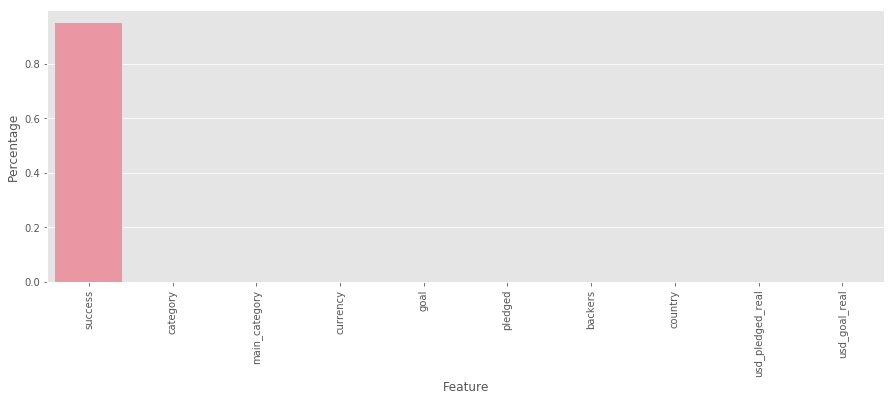

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_df['Feature'], y=missing_df['Percentage'])

## Imputing Missing Data

In [17]:
data.dropna(inplace=True)

# Categorical Features Analysis

## Category Analysis

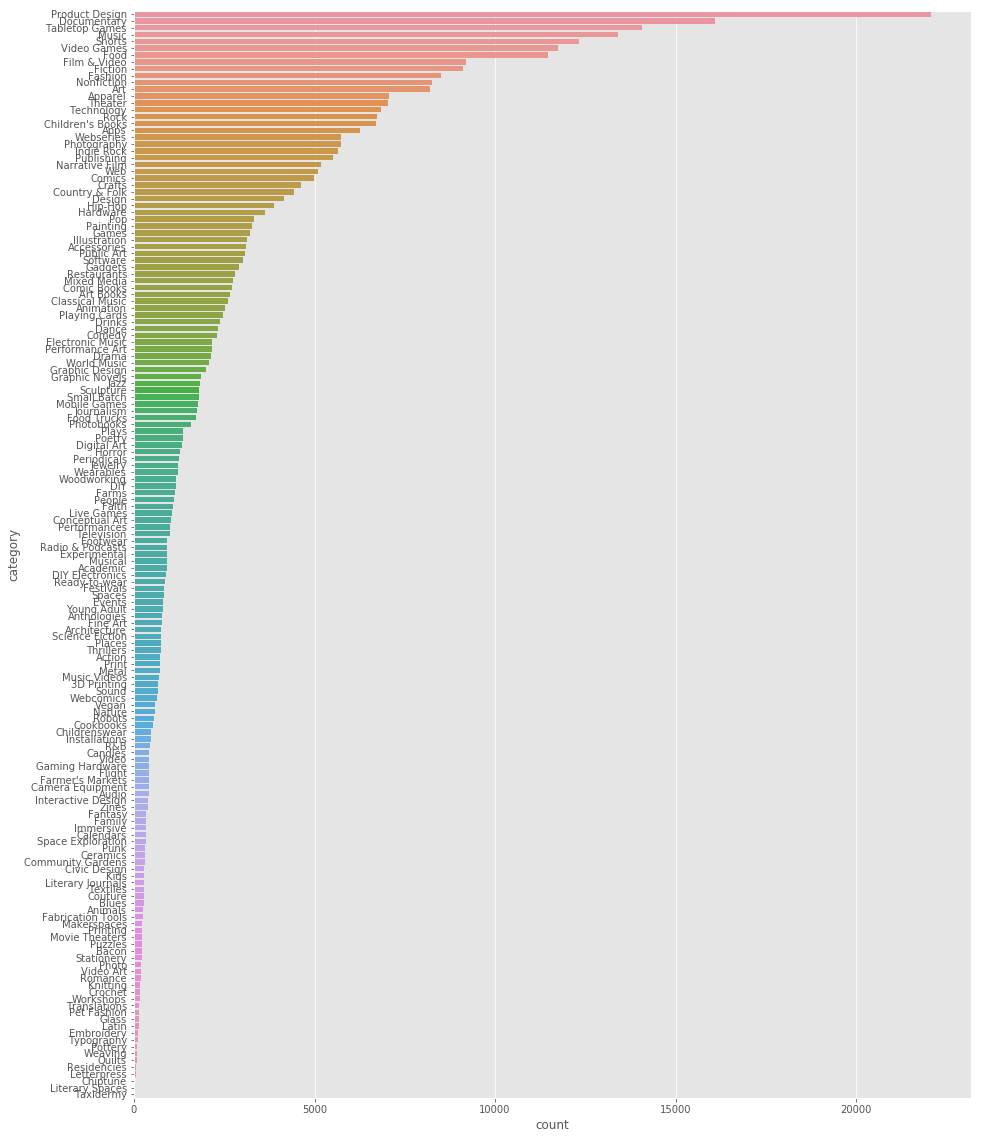

In [18]:
plt.subplots(figsize=(15, 20))
sns.countplot(y="category", order = data['category'].value_counts().index, data=data)

## Main Category Analysis 

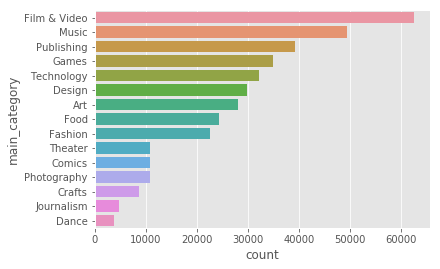

In [19]:
sns.countplot(y="main_category", order = data['main_category'].value_counts().index, data=data)

## Currency Analysis 

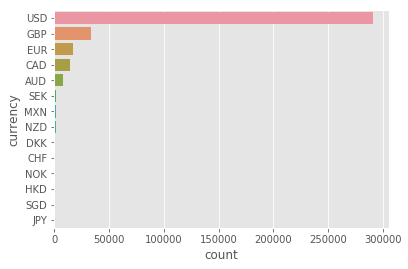

In [20]:
sns.countplot(y="currency", order = data['currency'].value_counts().index, data=data)

## Country Analysis

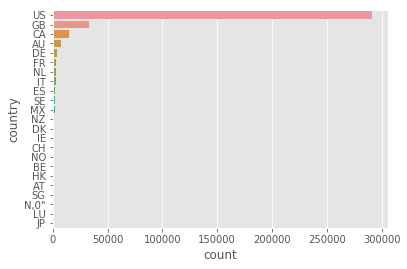

In [21]:
sns.countplot(y="country", order = data['country'].value_counts().index, data=data)

# Numerical Features Analysis

## Univariate Plots Distribution

### Distribution Plots

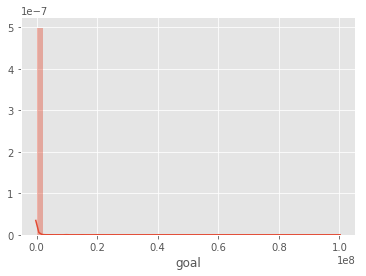

In [22]:
sns.distplot(data['goal'])

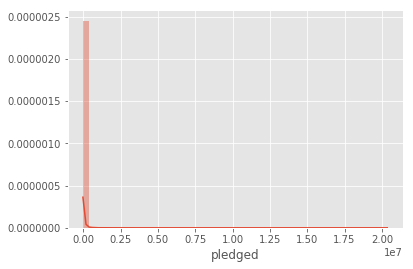

In [23]:
sns.distplot(data['pledged'])

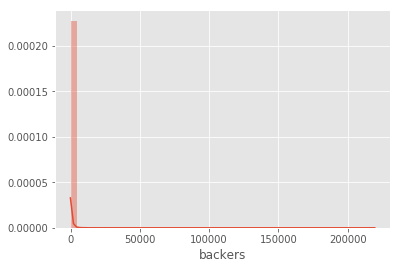

In [24]:
sns.distplot(data['backers'])

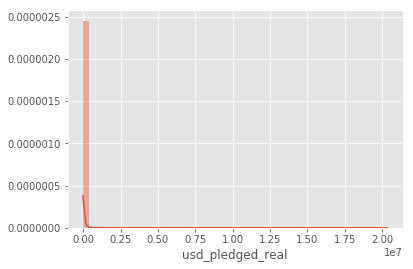

In [25]:
sns.distplot(data['usd_pledged_real'])

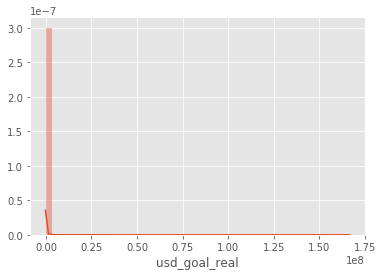

In [26]:
sns.distplot(data['usd_goal_real'])

# Machine Learning

## One Hot Encoding

### Label Encoder

In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data = data.apply(labelencoder.fit_transform)

### Dummy Variables

In [28]:
data = pd.get_dummies(data, columns=['category',
                                     'main_category',
                                     'currency',
                                     'country'])

## Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(['success'], axis=1)
y = data['success']

target_names=['Successful', 'Failed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Models

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [31]:
pipeline = Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

In [32]:
parameters = {"decisiontreeclassifier__min_samples_split": [20],
              "decisiontreeclassifier__max_depth": [10],
              "decisiontreeclassifier__min_samples_leaf": [10],
              "decisiontreeclassifier__max_leaf_nodes": [20],
              }

In [33]:
grid = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=5, scoring='precision', n_jobs=-1) 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'decisiontreeclassifier__min_samples_split': [20], 'decisiontreeclassifier__max_depth': [10], 'decisiontreeclassifier__min_samples_leaf': [10], 'decisiontreeclassifier__max_leaf_nodes': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

## Best parameters

In [34]:
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_)) 
print("Test set score: {:.2f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.93
Test set score: 0.93
Best parameters: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 20, 'decisiontreeclassifier__min_samples_leaf': 10, 'decisiontreeclassifier__min_samples_split': 20}


## Optimised model

In [46]:
from time import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

t0 = time()
y_pred = grid.predict(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.129s


In [38]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Successful       0.99      0.96      0.98     59668
      Failed       0.93      0.99      0.96     33407

   micro avg       0.97      0.97      0.97     93075
   macro avg       0.96      0.97      0.97     93075
weighted avg       0.97      0.97      0.97     93075

[[57198  2470]
 [  309 33098]]


In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC ROC:', roc_auc)

AUC ROC: 0.9746773592618141


Text(0.5, 0, 'False Positive Rate')

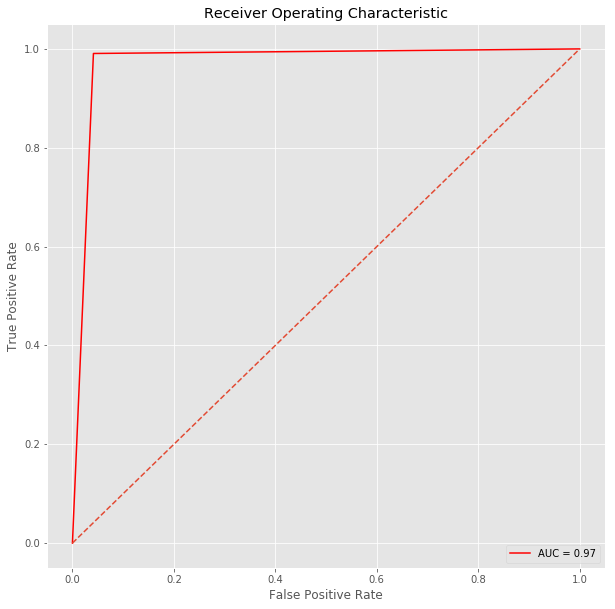

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')